# 逻辑回归

### 基本概念

逻辑回归是一种用于解决**二分类(Binary Classification)问题**的广义线性模型。尽管名字中带有回归，但实际上是解决分类问题的，输出的是**属于某个类别的概率**。 

**数学背景**

Sigmoid函数（也称为Logistic函数）将现行模型的输出映射到[0, 1]区间。$$\sigma(z)=\frac{1}{1+e^{-z}}$$

$\sigma(z)$值域是0到1

$\sigma(z)$是一个S型曲线，当z趋向正无穷，$\sigma(z)$趋于1.

**线性模型的基础**

在逻辑回归中，我们先构建一个线性模型：
$$ z = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n = \mathbf{w}^T\mathbf{x} $$

$\mathbf{x} = [1, x_1, x_2, \dots, x_n]^T$ 是输入特征向量（通常在第一个位置添加一个 1 来表示截距项 $w_0$）。

$\mathbf{w} = [w_0, w_1, w_2, \dots, w_n]^T$ 是模型的权重向量（包括截距 $w_0$）。

**概率的计算**

将线性模型的输出z代入sigmoid函数，就可以得到样本属于正类别（通常标记为1）的概率$P(Y=1|\mathbf{x})$:
$$ P(Y=1|\mathbf{x}; \mathbf{w}) = \hat{y} = \sigma(z) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}} $$
那么，样本属于负类别（0）的概率就是：
$$ P(Y=0|\mathbf{x}; \mathbf{w}) = 1 - \hat{y} = 1 - \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}} = \frac{e^{-\mathbf{w}^T\mathbf{x}}}{1 + e^{-\mathbf{w}^T\mathbf{x}}} $$

**Odds和Log-Odds/Logit**

$\bullet$ Odds:指的是事件发生与不发生的概率之比。
    $$ \text{Odds} = \frac{P(Y=1|\mathbf{x})}{P(Y=0|\mathbf{x})} = \frac{\hat{y}}{1 - \hat{y}} $$

将 Sigmoid 函数的定义代入，可以得到：
$$ \frac{\hat{y}}{1 - \hat{y}} = \frac{\frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}}}{\frac{e^{-\mathbf{w}^T\mathbf{x}}}{1 + e^{-\mathbf{w}^T\mathbf{x}}}} = \frac{1}{e^{-\mathbf{w}^T\mathbf{x}}} = e^{\mathbf{w}^T\mathbf{x}} $$

$\bullet$ Log-Odds/Logit
$$ \text{logit}(P(Y=1|\mathbf{x})) = \ln\left(\frac{P(Y=1|\mathbf{x})}{P(Y=0|\mathbf{x})}\right) = \ln(e^{\mathbf{w}^T\mathbf{x}}) = \mathbf{w}^T\mathbf{x} $$
这个式子表明逻辑回归的本质：**将输入的线性组合$\mathbf{w}^T\mathbf{x}$映射为事件发生的对数几率**。

**最大似然解释**

逻辑回归的损失函数来自于最大似然估计MLE。设样本标签$y_i \in \{0,1\}$预测概率为$\hat{y}_i$，则整个训练集的似然函数为：$$L(\mathbf{w}) = \prod_{i=1}^m \hat{y}_i^{y_i}(1 - \hat{y}_i)^{1 - y_i}$$
取对数并取负，得到交叉熵损失函数。


**损失函数(Loss Function)和成本函数(Cost Function)**

衡量参数为$\mathbf{w}$的模型拟合训练集时产生的信息损失

对于二分类问题，最常用的损失函数是二元交叉熵损失(Binary Cross-Entropy Loss)，也称为对数损失(Log Loss)

对于一个样本$(x_i, y_i)$，其损失贡献为：
$$ L(\hat{y}_i, y_i) = -[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

其中，$y_i$是真实标签(0/1)，$\hat{y}_i$是模型预测的概率$P(Y=1|x_i,\mathbf{w})$。

整个训练集的总损失函数($J(\mathbf{w})$)就是所有样本损失的平均值或者总和：$$ J(\mathbf{w}) = -\frac{1}{m}\sum_{i=1}^{m}[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

**我们的目标就是找到最小化$J(\mathbf{w})$的$\mathbf{w}$。

**优化算法**

由于二元交叉熵损失函数是凸函数，我们可以使用梯度下降法来寻找使损失函数最小化的权重。

梯度下降法：沿着损失函数梯度的反方向（即下降最快的方向）迭代更新权重。$$ \mathbf{w} := \mathbf{w} - \alpha \nabla J(\mathbf{w}) $$

其中$\alpha$ 是学习率，$\nabla J(\mathbf{w})$ 是损失函数 $J(\mathbf{w})$ 对权重向量 $\mathbf{w}$ 的偏导数（梯度）。

**正则化**

为防止过拟合，加入正则项：

$\bullet$ L2正则化(Ridge)：$$J(\mathbf{w}) = \text{原损失} + \frac{\lambda}{2m} \|\mathbf{w}\|_2^2$$
$\bullet$ L1正则化(Lasso)：$$J(\mathbf{w}) = \text{原损失} + \frac{\lambda}{m} \|\mathbf{w}\|_1$$
L1会将参数压缩为0产生稀疏解（部分权重为0），用于特征选择；L2只会让参数尽量小，不会取到0，更稳定，适用于一般情况。

如果特征量很大，数据维度很高，我们倾向于使用L1正则化。由于l1的这个特征，逻辑回归的特征选择可以用Embedded嵌入法来完成。

**决策边界(Decision Boundary)**

一旦模型训练完成，我们就可以使用它进行分类。通常，当预测概率 $\hat{y} \ge 0.5$ 时，我们将其归类为正类别 (1)；当 $\hat{y} < 0.5$ 时，归类为负类别 (0)。

由于 $\hat{y} = \frac{1}{1 + e^{-z}}$，当 $\hat{y} = 0.5$ 时，意味着 $1 + e^{-z} = 2$，所以 $e^{-z} = 1$，从而 $z = 0$。

因此，决策边界是由线性方程 $\mathbf{w}^T\mathbf{x} = 0$ 定义的。在二维特征空间中，这是一个直线；在更高维空间中，这是一个超平面。

**模型评估指标**

$\bullet$ Accuracy：准确率，适合样本平衡问题

$\bullet$ Precision/Recall/F1-Score：处理不平衡类别更有效

$\bullet$ ROC Curve, AUC：衡量模型的分类能力

$\bullet$ PR Curve：在极度不平衡数据中更有用

**缺点**

只能拟合线性边界

对特征缩放敏感

易受离群值干扰



### 评估指标

**confuse matrixs**

$\bullet$ True Positive：若一个实例为正类，并且被预测为正类，那么就是真正类TP  
$\bullet$ False Negitive：若一个实例为正类，但被预测为负类，那么就是假负类FN  
$\bullet$ False Positive：若一个实例为负类，但被预测为正类，那么就是假正类FP  
$\bullet$ True Negitive：若一个实例为负类，且被预测为负类，那么就是真负类TN  
混淆矩阵 $\begin{bmatrix}
TN & FP \\
FN & TP 
\end{bmatrix}$  

**Accuracy**

$$\frac{TP+TN}{ALL}$$  
不适合样本不均匀的情况  

**Precision** 正样本占预测为正样本的百分比  

$$\frac{TP}{TP+FP}$$  

**Recall** 查全率 正确预测为正样本占正样本的百分比  

$$\frac{TP}{TP+FN}$$

**F1-Score** 精确率和召回率是相互影响的，一个升高则另一个下降
$$\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

**ROC曲线**(Receiver Operating Characteristic)  

$\bullet$ 假正利率FPR为x轴，真正利率TPR为y轴  
TPR真正利率：所有实际为正例的样本中，被正确地判断为正例的概率$\frac{TP}{TR+FN}$  
FPR假正利率：所有实际为负例的样本中，被错误地判断为正例的概率$\frac{FP}{TN+FP}$  

**P-R曲线**

$\bullet$ 描述精确率和召回率变化的曲线  
$\bullet$ 以召回率为横轴，以精确率为纵轴     
$\bullet$ 右上往左下走，越靠近右上越好  
$\bullet$ 很适用于不平衡的数据(ROC会高估模型性能)   
$\bullet$ 曲线下的面积为AP(Average Precision)，这个面积越大说明在何种阈值下都兼顾了recall和precision  


**AUC**(Area Under Curve)  
显然这个数值不会大于1，一般在0.5和1之间，越大说明模型效力越高

**损失函数**

没有“求解参数”需求的模型没有损失函数，如KNN、随机森林。

损失函数是衡量参数为$\mathbf{w}$的模型拟合训练集时产生的信息损失。


### 代码示例

In [1]:
'''
penalty：l1或者l2来指定正则化方式，默认l2
        若填写l1，solver仅能使用liblinear和saga
C      :正则化强度的倒数，默认1.0
        C越小，模型对损失函数的惩罚越大，正则化效力越强，参数w会被压缩得越来越小
'''

'\npenalty：l1或者l2来指定正则化方式，默认l2\n        若填写l1，solver仅能使用liblinear和saga\nC      :正则化强度的倒数，默认1.0\n        C越小，模型对损失函数的惩罚越大，正则化效力越强，参数w会被压缩得越来越小\n'

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()

In [4]:
x = data.data
x.shape

# 30个特征

(569, 30)

In [5]:
y = data.target

In [ ]:
lrl1 = LR(penalty='l1', solver='liblinear', C = 0.5, max_iter=1000)
lrl2 = LR(penalty='l2', solver='liblinear', C=0.5, max_iter=1000)

In [7]:
lrl1 = lrl1.fit(x, y)

In [8]:
(lrl1.coef_!=0).sum(axis = 1)
# 留下了10个特征

array([10])

In [9]:
lrl2 = lrl2.fit(x, y)

In [10]:
(lrl2.coef_!=0).sum(axis = 1)
# 没有一个权重为0，符合前面的描述

array([30])

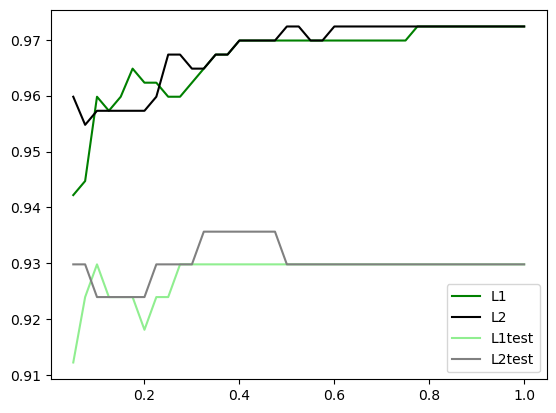

In [11]:
# 画C的学习曲线
l1 = []
l2 = []
l1test = []
l2test = []
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=420)
for i in np.linspace(0.05, 2, 39):
    lrl1 = LR(penalty='l1', solver='liblinear', C = i, max_iter=1000).fit(xtrain, ytrain)
    lrl2 = LR(penalty='l2', solver='liblinear', C = i, max_iter=1000).fit(xtrain, ytrain)
    l1.append(accuracy_score(lrl1.predict(xtrain), ytrain))
    l1test.append(accuracy_score(lrl1.predict(xtest), ytest))
    l2.append(accuracy_score(lrl2.predict(xtrain), ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest), ytest))


graph = [l1, l2, l1test, l2test]
color = ['green', 'black', 'lightgreen', 'gray']
label = ['L1', 'L2', 'L1test', 'L2test']

plt.figure()
for i in range(len(graph)):
    plt.plot(np.linspace(0.05, 1, 39), graph[i], color[i], label = label[i])

plt.legend()
plt.show()

# 两种正则化方式的结果差别不大
# 在测试集表现很好，在训练集表现略欠，有轻微的过拟合
# 当C越来越大，对损失函数的惩罚就越小，对w的压缩越小

# 选择C = 0.9

### 逻辑回归中的特征工程

**业务选择**

**PCA和SVD一般不用**

降维结果不可解释，就不知道特征和标签之间的关系了

**统计方法**可以使用，但不是非常必要

过滤法中的所有方法。方差、卡方、互信息法，都可以用在逻辑回归上。

不使用最小二乘法，多重共线性没有太大影响。

**系数累加法**
在PCA中，画累计可解释性方差贡献率曲线来选择超参数，在逻辑回归中其实也可以用类似：找出曲线锐利变平滑的转折点，转折点之前被累加的特征都是我们需要的。但是相对麻烦，因为需要我们自己对特征系数进行由大到小的排序，还要知道排序后的每个系数分别对应哪一个原始特征。

**包装法**

可以直接设定我们需要的特征个数。



##### 代码示例

In [12]:
from sklearn.feature_selection import SelectFromModel

In [13]:
lr = LR(solver='liblinear', C=0.8, random_state=420)
cross_val_score(lr, x, y, cv =10).mean()

0.9508145363408522

In [14]:
# 对x使用嵌入法进行特征选择
# 使用lasso正则化，目的是让不重要的参数的权重为0
x_embedded = SelectFromModel(lr, norm_order=1).fit_transform(x, y)
x_embedded.shape
# 只保留了9个特征了

(569, 9)

In [15]:
cross_val_score(lr, x_embedded, y, cv = 10).mean()
# 结果下降

0.9368107769423559

In [16]:
lr.fit(x, y).coef_

array([[ 1.95799624,  0.11083823, -0.03171089, -0.0033944 , -0.13610507,
        -0.37170396, -0.58854985, -0.30534783, -0.1984111 , -0.02385298,
        -0.01117559,  1.12998469,  0.04949297, -0.09491655, -0.01481717,
        -0.00339595, -0.05053139, -0.03625549, -0.03785484,  0.00452904,
         1.26132542, -0.32873269, -0.13721045, -0.0237483 , -0.25174659,
        -1.05684804, -1.45775583, -0.58759531, -0.60946442, -0.10573921]])

0.0 30
0.10305243357045595 17
0.2061048671409119 12
0.3091573007113678 10
0.4122097342818238 8
0.5152621678522797 8
0.6183146014227356 5
0.7213670349931917 5
0.8244194685636476 5
0.9274719021341035 5
1.0305243357045595 5
1.1335767692750154 3
1.2366292028454713 3
1.3396816364159272 2
1.4427340699863833 2
1.5457865035568392 1
1.6488389371272951 1
1.751891370697751 1
1.854943804268207 1
1.9579962378386628 1


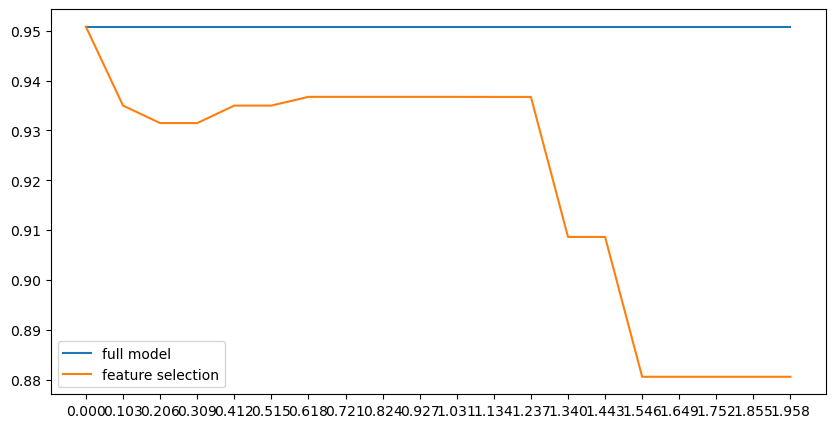

In [17]:
# 希望可以在特征减少的时候，模型拟合效果不下降
# 可以调节threshold，画学习曲线；或者调整逻辑回归的C
fullmodel = []
thrmodel = []
threshold = np.linspace(0, (abs(lr.fit(x, y).coef_)).max(), 20)
k = 0
for i in threshold:
    x_embedded = SelectFromModel(lr, threshold= i, norm_order=1).fit_transform(x, y)
    fullmodel.append(cross_val_score(lr, x, y, cv = 5).mean())
    thrmodel.append(cross_val_score(lr, x_embedded, y, cv = 5).mean())
    print(threshold[k], x_embedded.shape[1])
    k = k + 1

plt.figure(figsize=(10,5))
plt.plot(threshold, fullmodel, label = "full model")
plt.plot(threshold, thrmodel, label = 'feature selection')
plt.xticks(threshold)
plt.legend()
plt.show()

# 可以看到降维之后效果显著下降

0.0 30
0.005421052631578947 27
0.010842105263157894 27
0.01626315789473684 25
0.02168421052631579 25
0.027105263157894736 23
0.03252631578947368 22
0.03794736842105263 20
0.04336842105263158 20
0.04878947368421052 20
0.05421052631578947 18
0.05963157894736842 18
0.06505263157894736 18
0.07047368421052631 18
0.07589473684210526 18
0.0813157894736842 18
0.08673684210526315 18
0.0921578947368421 18
0.09757894736842104 17
0.103 17


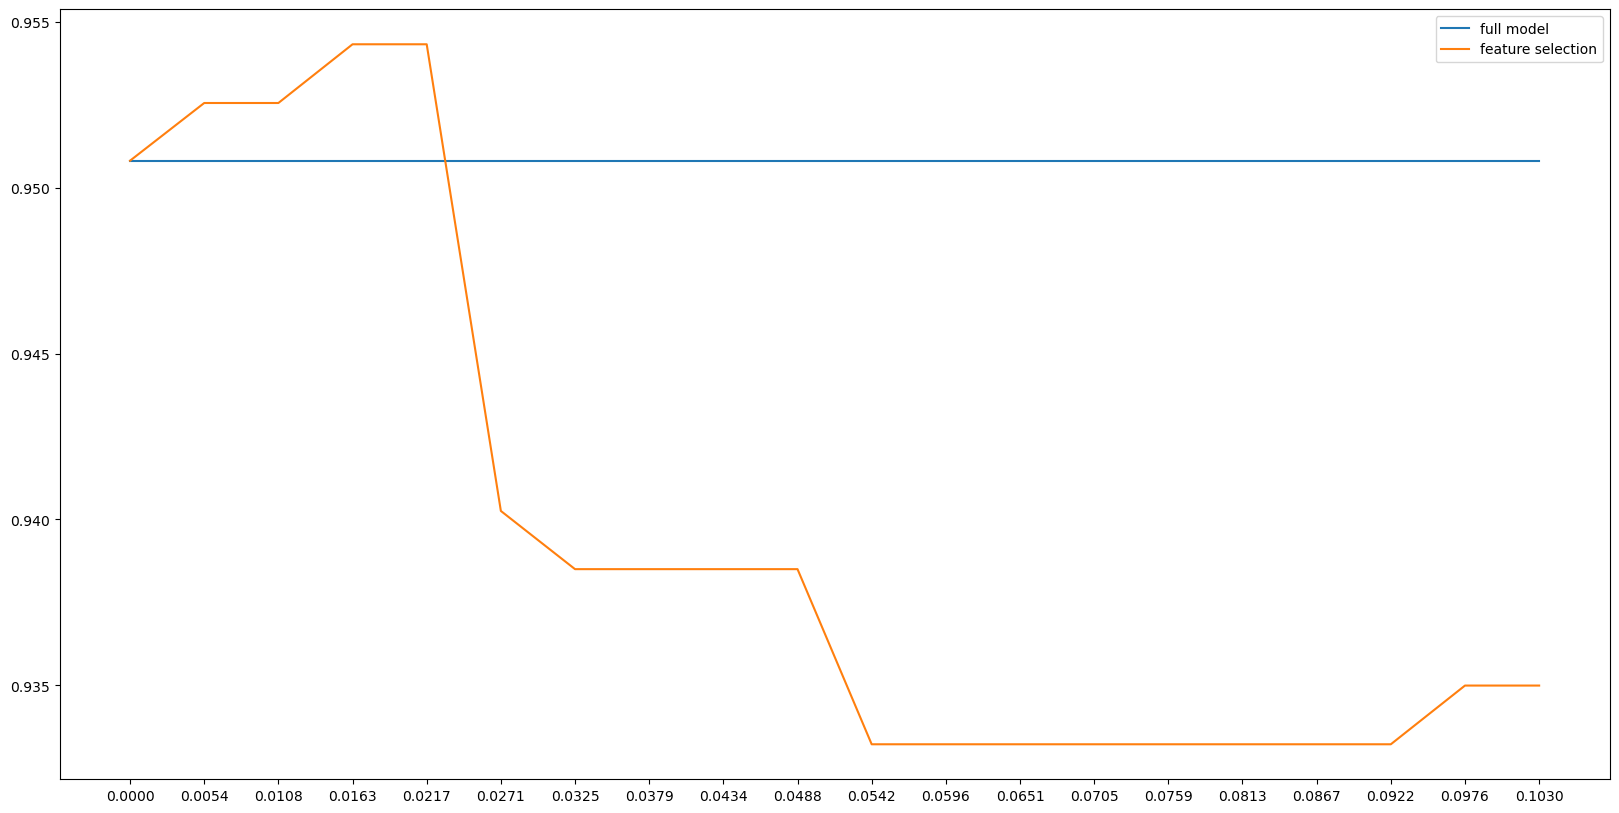

In [18]:
# 细化
fullmodel = []
thrmodel = []
threshold = np.linspace(0, 0.103, 20)
k = 0
for i in threshold:
    x_embedded = SelectFromModel(lr, threshold= i, norm_order=1).fit_transform(x, y)
    fullmodel.append(cross_val_score(lr, x, y, cv = 5).mean())
    thrmodel.append(cross_val_score(lr, x_embedded, y, cv = 5).mean())
    print(threshold[k], x_embedded.shape[1])
    k = k + 1

plt.figure(figsize=(20,10))
plt.plot(threshold, fullmodel, label = "full model")
plt.plot(threshold, thrmodel, label = 'feature selection')
plt.xticks(threshold)
plt.legend()
plt.show()

# 发现至少保留25个特征，对于现实仍然没有参考意义

0.9543546365914788 4.01


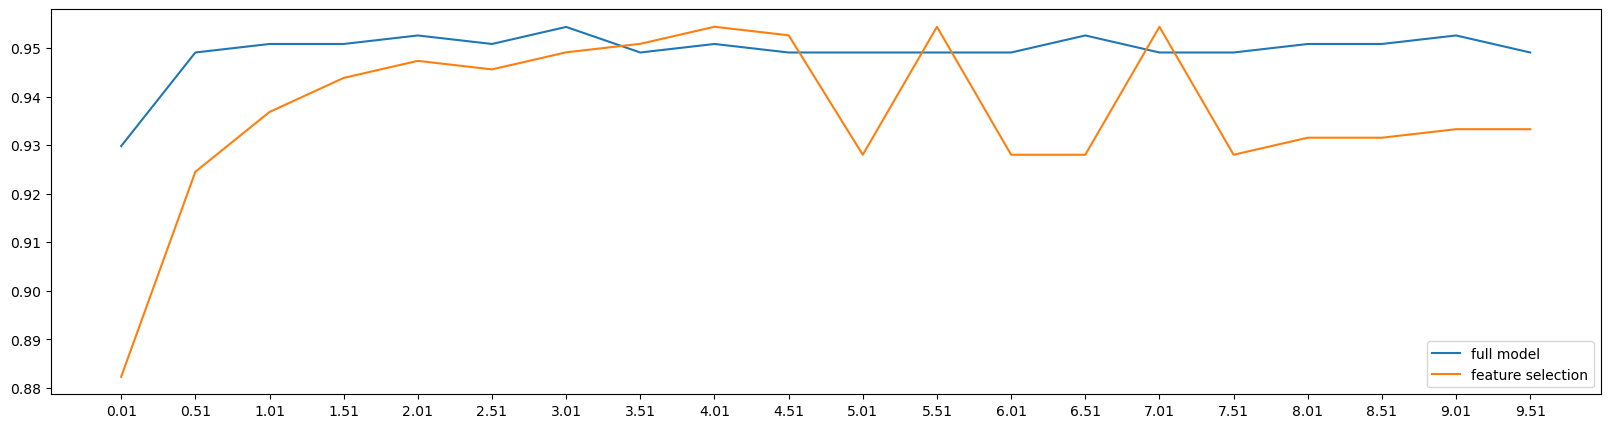

In [19]:
# 调整逻辑回归模型本身C
fullmodel = []
selmodel = []
C = np.arange(0.01, 10.01, 0.5)

for i in C:
    lrc = LR(solver='liblinear', C = i, random_state=420)
    fullmodel.append(cross_val_score(lrc, x, y, cv = 10).mean())
    x_embedded = SelectFromModel(lrc, norm_order=1).fit_transform(x, y)
    selmodel.append(cross_val_score(lrc, x_embedded, y, cv = 10).mean())


print(max(selmodel), C[selmodel.index(max(selmodel))])
    

plt.figure(figsize=(20,5))
plt.plot(C, fullmodel, label = "full model")
plt.plot(C, selmodel, label = 'feature selection')
plt.xticks(C)
plt.legend()
plt.show()

0.9543546365914788 3.6799999999999864


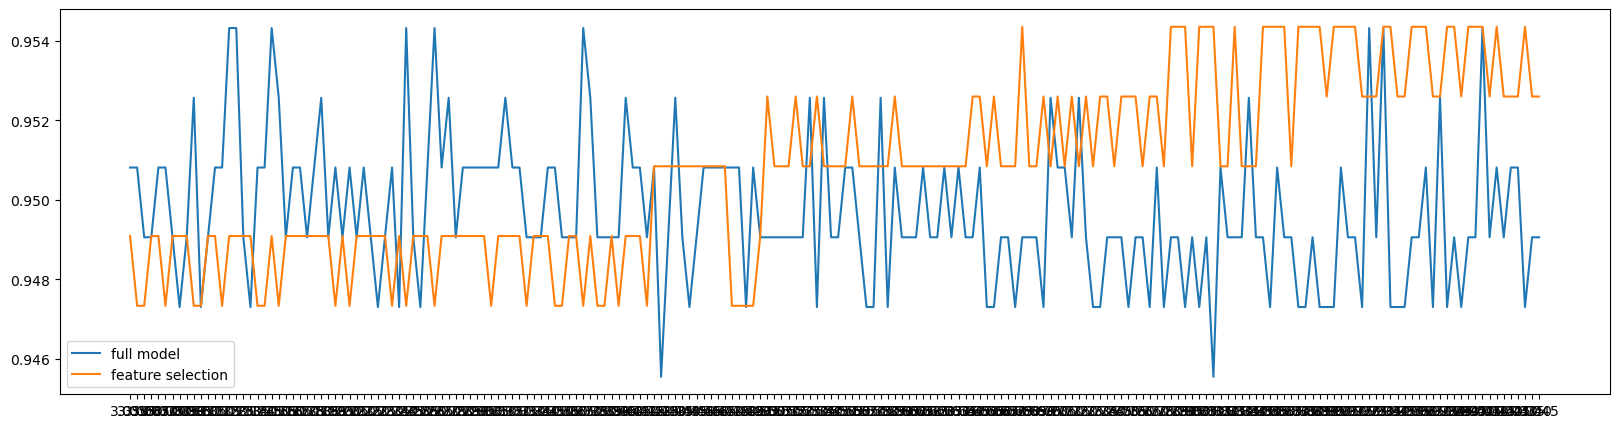

In [20]:
# 细化
fullmodel = []
selmodel = []
C = np.arange(3.05, 4.05, 0.005)

for i in C:
    lrc = LR(solver='liblinear', C = i, random_state=420)
    fullmodel.append(cross_val_score(lrc, x, y, cv = 10).mean())
    x_embedded = SelectFromModel(lrc, norm_order=1).fit_transform(x, y)
    selmodel.append(cross_val_score(lrc, x_embedded, y, cv = 10).mean())


print(max(selmodel), C[selmodel.index(max(selmodel))])
    

plt.figure(figsize=(20,5))
plt.plot(C, fullmodel, label = "full model")
plt.plot(C, selmodel, label = 'feature selection')
plt.xticks(C)
plt.legend()
plt.show()

In [21]:
lrbef = LR(solver='liblinear', C=3.6799999999999864, random_state=420)
x_embedded = SelectFromModel(lrbef, norm_order=1).fit_transform(x, y)
cross_val_score(lrbef, x_embedded, y, cv = 10).mean()

0.9543546365914788

In [22]:
x_embedded.shape

# 10个特征

(569, 10)

### 重要参数max_iter

##### 梯度下降法求解逻辑回归

我们追求损失函数的最小值对应的$\mathbf{w}$。

沿着梯度的反方向（最速下降的方向）进行迭代求解。

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


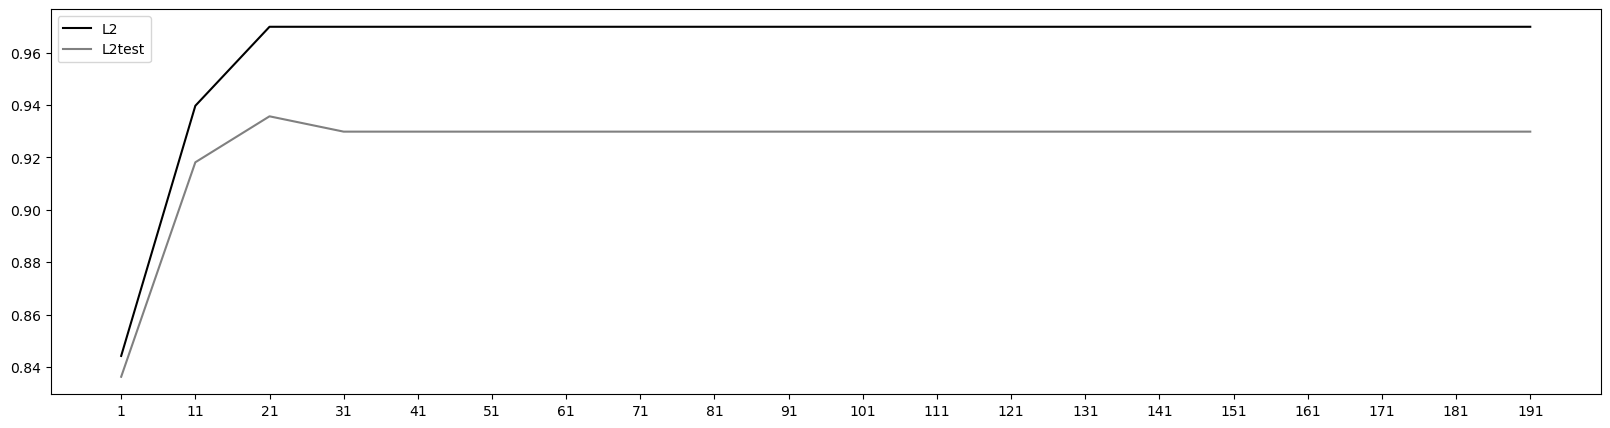

In [23]:
# 画max_iter的学习曲线
l2 = []
l2test =  []

for i in np.arange(1, 201, 10):
    lrl2 = LR(penalty='l2', solver='liblinear', C=0.9, max_iter=i).fit(xtrain, ytrain)
    l2.append(accuracy_score(lrl2.predict(xtrain), ytrain))
    l2test.append(accuracy_score(lrl2.predict(xtest), ytest))

graph = [l2, l2test]
color = ['black', 'gray']
label = ['L2', 'L2test']

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1, 201, 10), graph[i], color[i], label = label[i])


plt.legend()
plt.xticks(np.arange(1, 201, 10))
plt.show()

# 在训练集的表现好于测试集
# 在21时达到峰值
# 警告是因为还没有找到最小值，还要增大最大迭代次数，但是此时模型最终效果已经不错了，那我们就无需理warning

In [24]:
lr =LR(penalty='l2', solver='liblinear', C=0.9, max_iter=40).fit(xtrain, ytrain)
lr.n_iter_

# 真正的迭代次数为24，没有到300次

array([24], dtype=int32)

### 二元回归与多元回归
muti_calss：
            ovr：二分类或者“一对多”处理多分类问题
            mutinoninal：多分类
            auto：默认
solver：计算逻辑回归的求解器

In [25]:
# 在三分类数据集上
from sklearn.datasets import load_iris
iris = load_iris()

In [28]:
for multi_class in ('multinomial', 'ovr'):
    lr = LR(solver = 'sag', max_iter = 100, random_state=420
            ,multi_class=multi_class
            ).fit(iris.data, iris.target)
    print('train score: %.3f(%s)' % (lr.score(iris.data, iris.target), multi_class))

train score: 0.987(multinomial)
train score: 0.960(ovr)


d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 样本不平衡、参数class_weight、上采样

使用class_weight给少量的标签更多的权重  
   none：默认给所有的标签1:1  
   banlanced：当误分类代价很高时  
   什么都不填：只是希望对标签均衡时  

但是这个参数很难用，很难找出趋势，更主流的方法是采样法。

上采样（增加少数类的样本），比如AMOTE；或者下采样（减少多数类的样本）。对于逻辑回归来说，**上采样**是最好的办法